# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.0 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.0

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
df=pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [68]:
# view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [69]:
# rows and columns of the dataframe
df.shape
print('The data has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The data has 1898 rows and 9 columns.


### **Observations**:
* There are 1898 rows and 9 columns in the given dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [70]:
# Datatypes of different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Observations**:

* There are 4 columns with integer data types, 4 columns with object data types and 1 column with float data type.
* Out of all 1898 rows, there are no missing values(i.e. all are non-null).





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [71]:
# checking for the missing values in the dataset

df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Observations**:
* There are no missing values in the data.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# statistical summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Observations**:
While checking the Food Preparation Time,
* the minimum is 20 min,
* the average is 27.37 min
* and the maximum is 35 min.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
#checking the unique values in the 'rating' column

df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [14]:
#checking to see how many 'not given' ratings present
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


### **Observations**:
* The number of order that are not rated is 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [15]:
#check unique orders
df['order_id'].nunique()
print('There are {} unique orders.'.format(df['order_id'].nunique()))


There are 1898 unique orders.


In [16]:
#check unique customer id
df['customer_id'].nunique()
print('There are {} unique customers.'.format(df['customer_id'].nunique()))

There are 1200 unique customers.


In [17]:
#unique cuisine type
df['cuisine_type'].nunique()
print('There are {} unique cuisine types.'.format(df['cuisine_type'].nunique()))

There are 14 unique cuisine types.


In [18]:
#top 5 cuisine types
df['cuisine_type'].value_counts().nlargest(5)


,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


### **Observations**:
* There are 1898 unique orders for 1200 unique customers.
* Means, some customers have placed more than one order.
* There are 14 unique cuisine types.
* The top 5 cuisines are American, Japanese, Italian, Chinese and Mexican.

### **Popularity of the Cuisine Type**:

<ipython-input-79-c8f1e37822a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine_type', palette='viridis', order=df['cuisine_type'].value_counts().index)


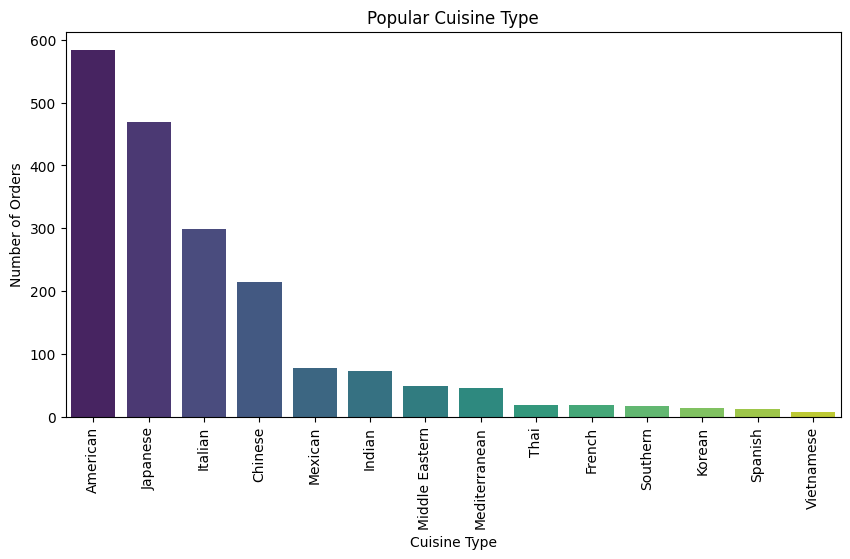

In [79]:
# check countplot with number of orders for each cuisine type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', palette='viridis', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Popular Cuisine Type')
plt.show()

### **Observations**:

Based on the countplot, it is observed that American cuisines are the most popular and followed by Japanese, Italian, Chinese.

### **Cost of the Order**


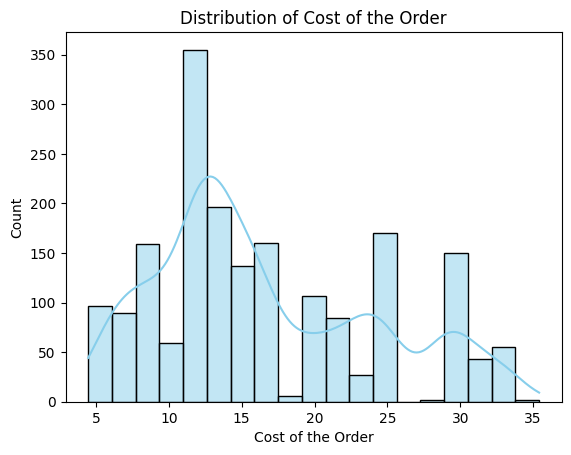

In [85]:
# generating histogram of the cost of the order
sns.histplot(data=df, x='cost_of_the_order', color='skyblue', kde=True)
plt.xlabel('Cost of the Order')
plt.title('Distribution of Cost of the Order')
plt.show()


In [86]:
df['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


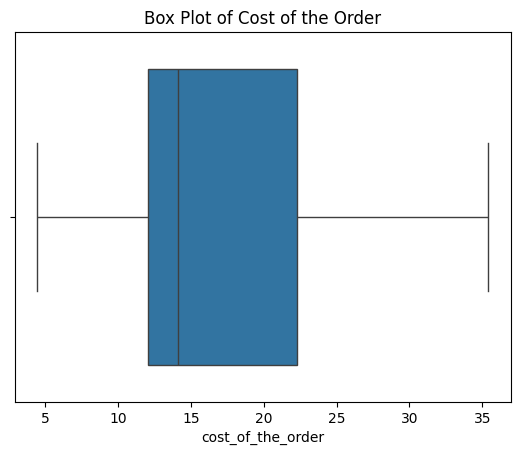

In [21]:
#generating a box plot of the cost of the order
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Box Plot of Cost of the Order')
plt.show()

### **Observation**:
* The average cost of the order is greater than the median cost indicating that the distribution for the cost of the order is right-skewed.

* The mode of the distribution indicates that a large chunk of people prefer to order food that costs around 10-12 dollars.

* There are few orders that cost greater than 30 dollars. These orders might be for some expensive meals.

### **Day of the week**


In [22]:
# check the unique value in day of the week column
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


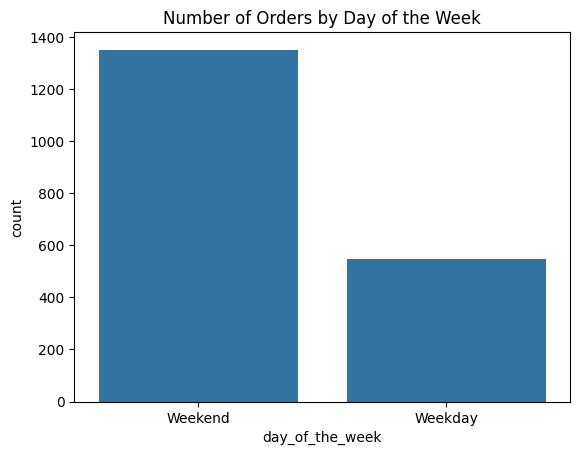

In [23]:
sns.countplot(data=df, x='day_of_the_week')
plt.title('Number of Orders by Day of the Week')
plt.show()

### **Observation**:
* There are 1351 Weekend orders and 547 weekday orders.
* The number of order placed in Weekend is almost double.


### **Restaurant Name**



In [24]:
# unique restaurants in the dataset
df["restaurant_name"].nunique()

178

In [25]:
# Show the top 10 restaurants in terms of the number of orders they received.
df["restaurant_name"].value_counts().head(10)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


<Axes: title={'center': 'Top 10 Restaurants Based on Number of Orders'}, xlabel='count', ylabel='restaurant_name'>

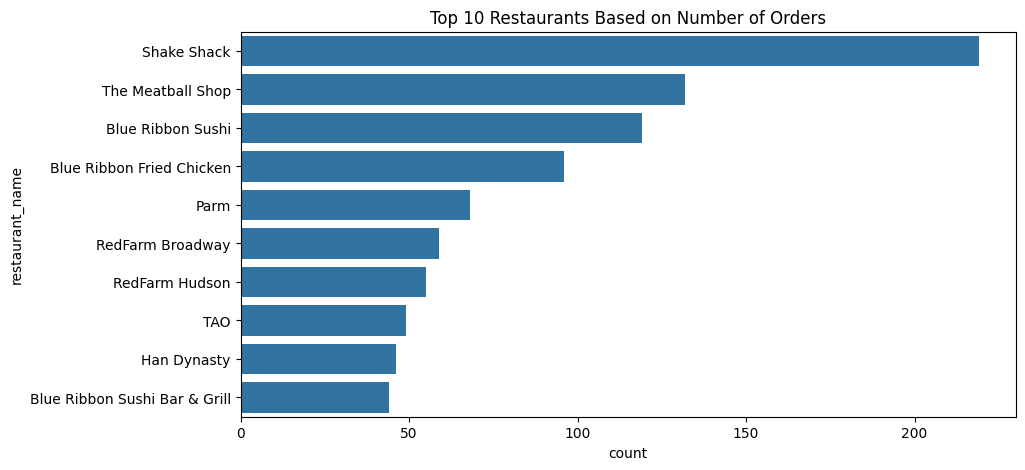

In [26]:
# countplot for top 10 restaurants based on the number of orders they received.
plt.figure(figsize=(10,5))
plt.title('Top 10 Restaurants Based on Number of Orders')
sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().iloc[:10].index)

### **Observation**:
* The top 10 restaurant based on the number of orders are observed in the decreasing order.
* Shake Shack received highest, 219 orders followed by The Meatball Shop with 132 orders and Blue Ribbon Sushi with 119 orders.

### **Statistics on Food Preparation Time**


In [27]:
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


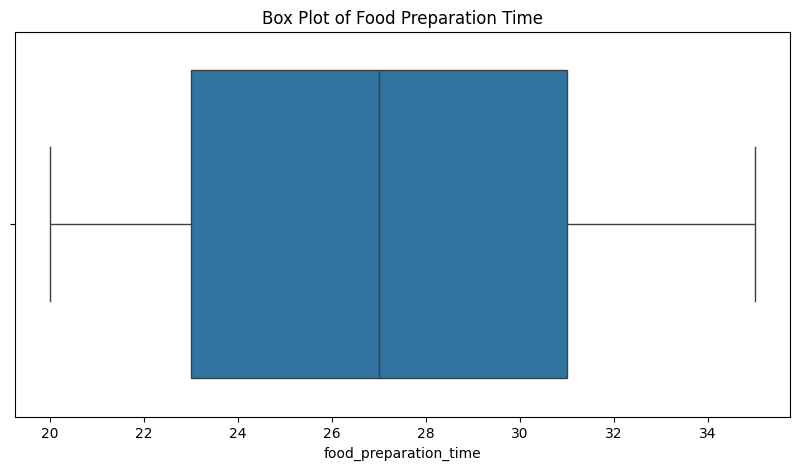

In [28]:
# Box plot showing the percentage of orders based on food preparation time (in minutes)
plt.figure(figsize=(10,5))
plt.title('Box Plot of Food Preparation Time')
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

### **Observation**:
From the Box Plot, 5-point summary of the data are as follows:
* Minimum food preparation time is 20 min.
* 25%(First quartile) of the order has been prepared under 23 min.
* The median for the food preparation time is 27 min.
* 75% (Third quartile) of the order has been prepared under 31 min.
* Maximum food preparation time is 35 min.


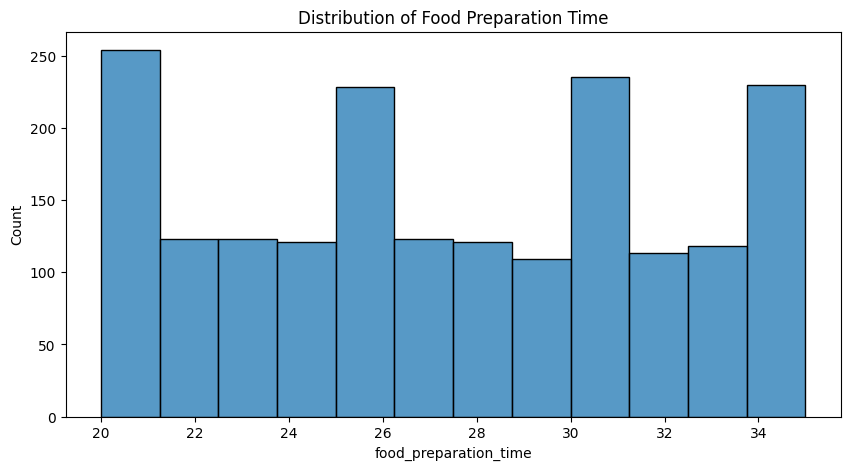

In [87]:
# histogram of number of orders based on food preparation time(in minutes)

plt.figure(figsize=(10,5))
plt.title('Distribution of Food Preparation Time')
sns.histplot(data=df, x='food_preparation_time')
plt.show()

### Statistics on Delivery Time


In [30]:
# Describing the statisticds on delivery time
df['delivery_time'].describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


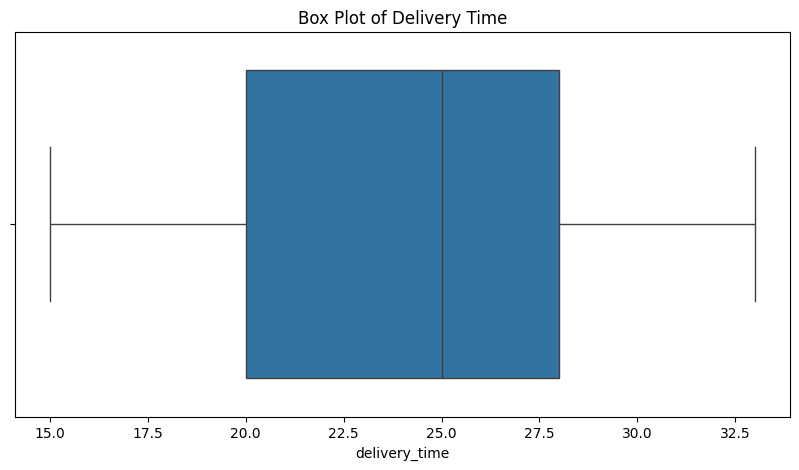

In [31]:
#Box plot on delivery time
plt.figure(figsize=(10,5))
plt.title('Box Plot of Delivery Time')
sns.boxplot(data=df, x='delivery_time')
plt.show()

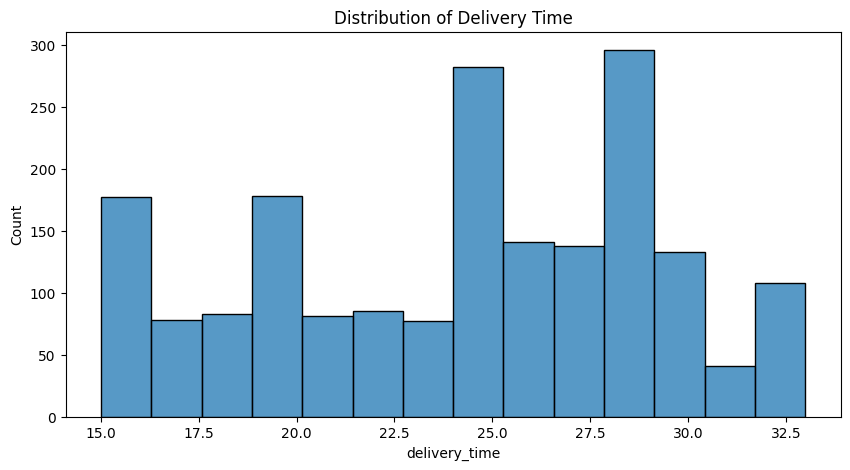

In [88]:
#Histogram on number of order based on delivery time( in minutes)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='delivery_time')
plt.title('Distribution of Delivery Time')
plt.show()

### **Observation**:
* The mean delivery time is 24.16 min.
* The minimum delivery time is 15 min.
* 25%(First quartile) of the order has been delivered under 20 min.
* The median for the food delivery time is 25 min.
* 75% (Third quartile) of the order has been delivered under 28 min.
* Maximum food preparation time is 33 min.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [33]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### **Observations**:
The top 5 restaurants with the most number of orders received (from most to least) are:
1.  Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi,
4. Blue Ribbon Fried Chicken and
5. Parm.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [34]:
# Write the code here

df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


### **Observation**:
* The most popular cuisine on Weekends is American with 415 out of 1898 orders.



:### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [35]:
# Here is the required code

df[df['cost_of_the_order']>20].shape[0]/df.shape[0]

#calculating the percentage
print('{}% of the orders cost more than 20 dollars.'.format(round(df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100,2)))




29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [36]:
# Write the code here
df['delivery_time'].mean()

print('The mean order delivery time is {} minutes.'.format(round(df['delivery_time'].mean(),2)))

The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [37]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


### **Observation**:
Top 3 most frequent customers are:
* ID 52832 placed 13 orders.
* ID 47440 placed 10 orders.
* ID 83287 placed 9 orders.

### **Multivariate** **Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Note**
* Order ID and Customer ID can be ignored in the Multivariate analysis as they don't contribute in understanding relationship with other variables.

In [38]:
# Dropping order_id and customer_id columns
new_df=df.drop(['order_id','customer_id'],axis=1)

In [39]:
new_df.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1898 non-null   object 
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


### **Observation**:
* Now there are 4 categorical and 3 numerical variables in the dataset.



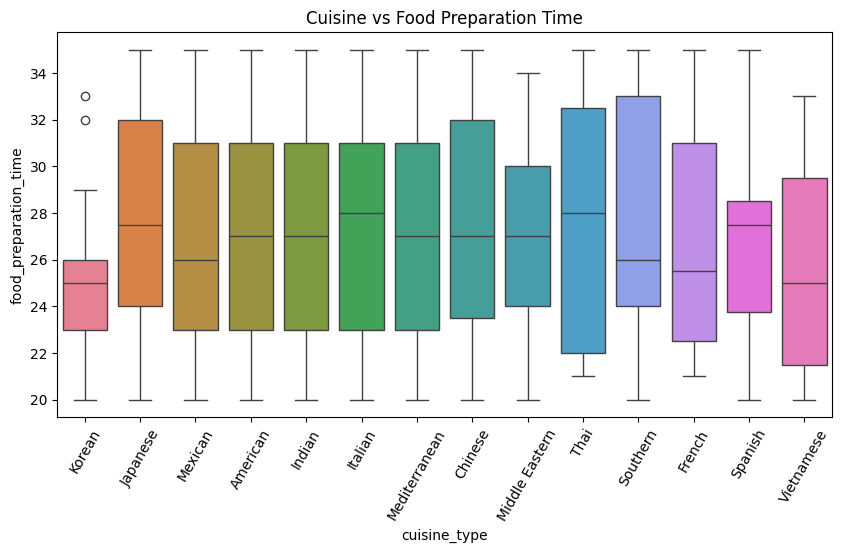

In [90]:
# Cuisine vs Food Preparation time
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time", hue='cuisine_type')
plt.xticks(rotation = 60)
plt.title("Cuisine vs Food Preparation Time")
plt.show()


### **Observation:**
* We could see in these boxplots that most cuisines had a cost from about 10 to 25 dollars per order.
* Few outliers were observed but these could be normal since eating habits could differ.

<ipython-input-92-9795b69e9aa0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'Paired')


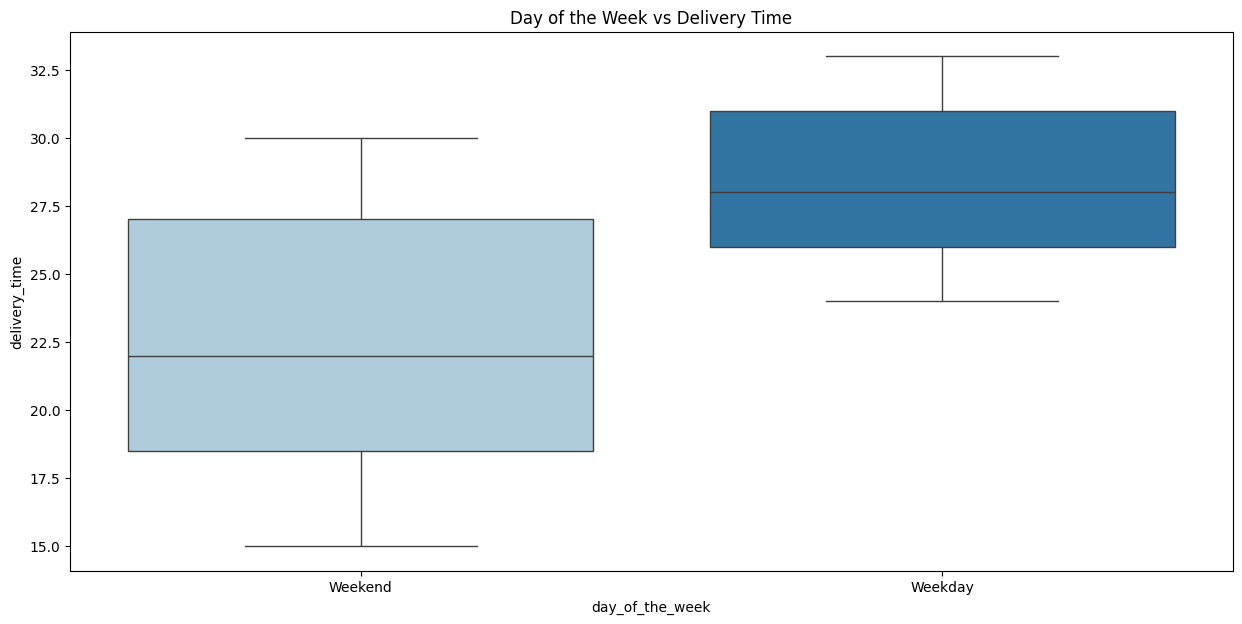

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64


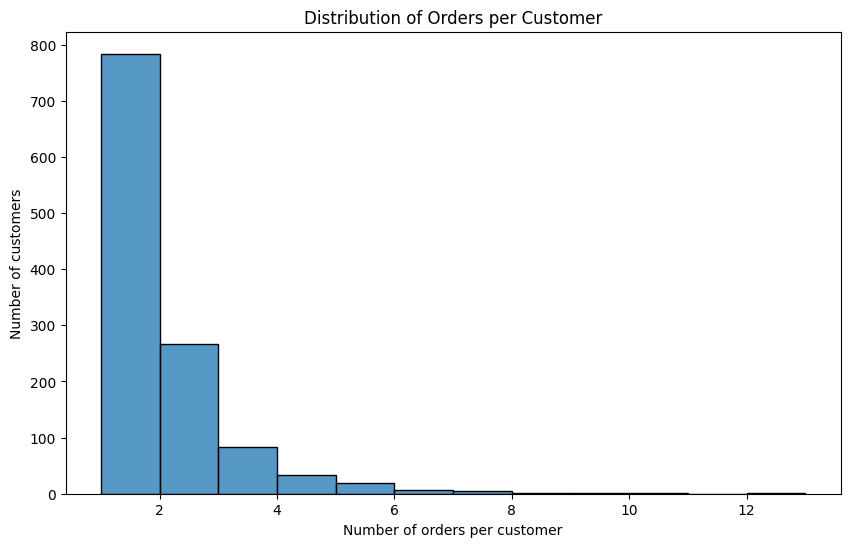

In [92]:
# Day of the Week vs Delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'Paired')
plt.title("Day of the Week vs Delivery Time")
plt.show()

# Rating vs Cost of the order
restaurant_revenue = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(14)
print(restaurant_revenue)

# Assuming 'customer_id' has unique values for each customer
customer_order_counts = df['customer_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(customer_order_counts, binwidth=1)
plt.xlabel("Number of orders per customer")
plt.ylabel("Number of customers")
plt.title("Distribution of Orders per Customer")
plt.show()



                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   

                       delivery_time    rating  
cost_of_the_order          -0.029949  0.033983  
food_preparation_time       0.011094 -0.006083  
delivery_time               1.000000 -0.009804  
rating                     -0.009804  1.000000  


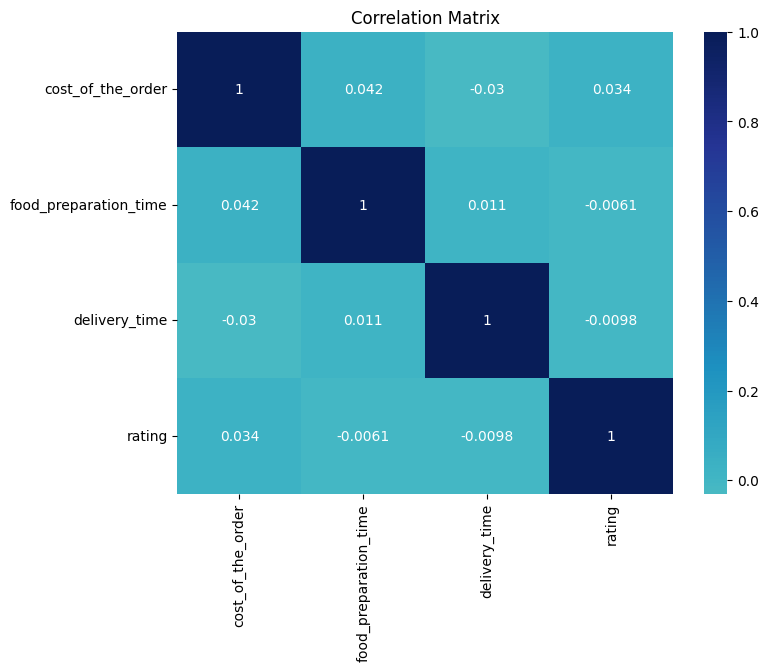

In [93]:
# Compute correlations between numerical variables
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Matrix')
plt.show()


### **Observation**:
* Among the numerical variables cost_of_the_order, food_preparation_time, delivery_time and rating, there appears to be no correlation.

* This establishes that there is no relationship in these variables.

* Order and customer id are just identifiers so even though they are numerical we can ignore for the correlation map.



<Axes: xlabel='cuisine_type', ylabel='count'>

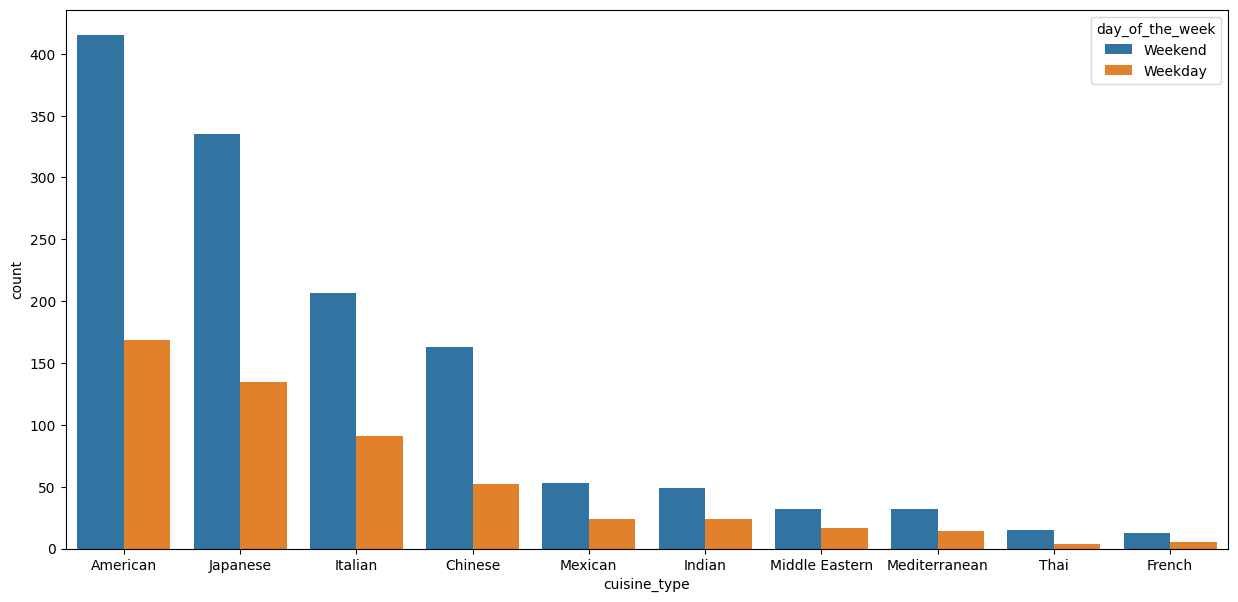

In [58]:
#count plot of cuisine_type based on day of the week
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order = df.cuisine_type.value_counts().iloc[:10].index)

### **Observation**:
Increased sales are observed across all cuisines during weekends.

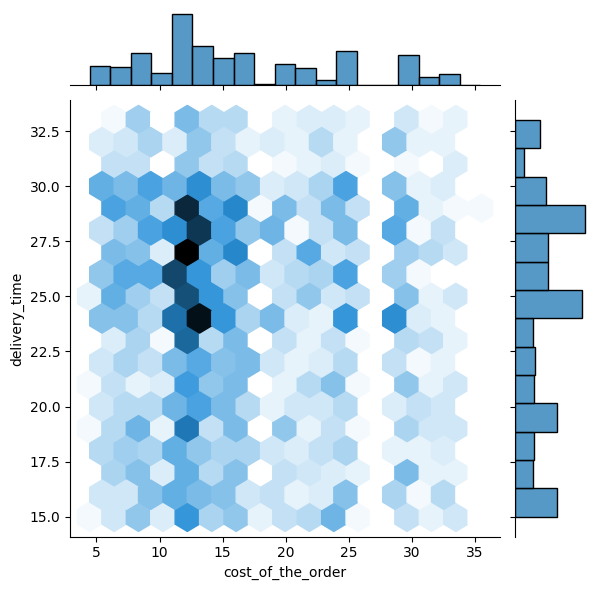

In [59]:
#jointpolot based on cost of order and delivery time
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex')


## **Observation**:
* Most of the order costs around  $11, with delivery times ranging mostly between 24 and 30 minutes.

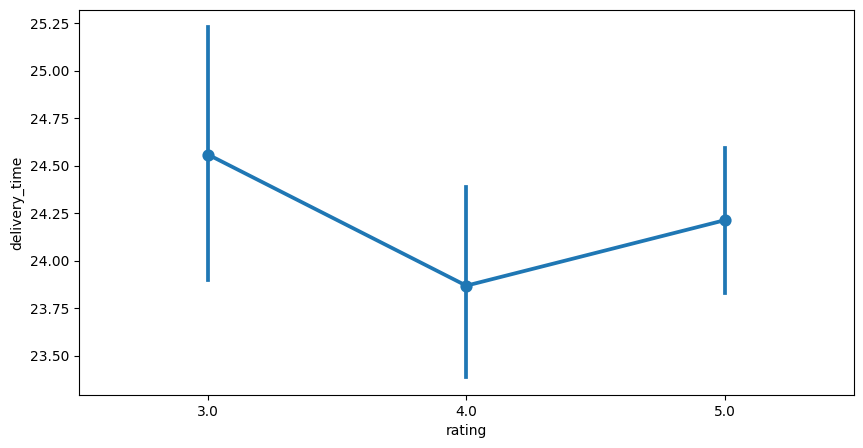

In [98]:
#Relation between rating and delivery time
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### **Obversation**:
Based on the plot, it might be a possibility that delivery time plays a role in the low rating of the orders.

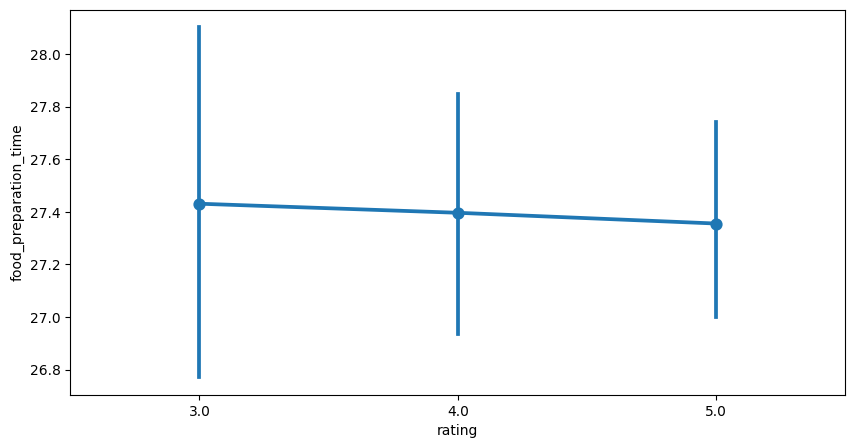

In [99]:
# Relationship between rating and food preparation time
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

### **Observation**:
It seems that food preparation time does not play a role in the low rating of the orders.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
#convert rating values to numeric and giving nan for the ratings that were not given.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#create columns that give average ratings for each restaurant and count how many ratings were given.
rest_rating = df.groupby(['restaurant_name'])['rating'].agg(['count', 'mean'])

#filter out which results are above 4 rating and number of reviews above 50.
rest_rating =  rest_rating[(rest_rating['mean'] > 4) & (rest_rating['count'] > 50)].sort_values(by='count', ascending=False)
print(rest_rating)


                           count      mean
restaurant_name                           
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905
Blue Ribbon Sushi             73  4.219178
Blue Ribbon Fried Chicken     64  4.328125


### **Observations**:
 The four restaurants that fit the promotional offer criteria are Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken and Blue Ribbon Sushi. These were the only restaurants that had over 50 orders and average rating above 4.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
# Write the code here
# Filter orders with cost greater than 20 and calculate income
A = df[df['cost_of_the_order'] > 20]
A_income = (A['cost_of_the_order'] * 0.25).sum()

# Filter orders with cost between 5 and 20 and calculate income
B = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)]
B_income = (B['cost_of_the_order'] * 0.15).sum()

# Calculate total income
total_income = A_income + B_income

print(f"The net revenue generated by the company across all orders is {total_income:.2f} dollars.")

The net revenue generated by the company across all orders is 6166.30 dollars.


### **Observations**:
The net revenue generated by the company across all orders is 6166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
# Write the code here
# Calculate total time required for each order
df['Total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders with Total_time greater than 60 minutes
percentage_over_60 = (df['Total_time'] > 60).mean() * 100

print(f"Percentage of orders taking more than 60 minutes is {percentage_over_60:.2f}%")




Percentage of orders taking more than 60 minutes is 10.54%


### **Observations**:
The percentage of orders taking more than 60 minutes is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [47]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


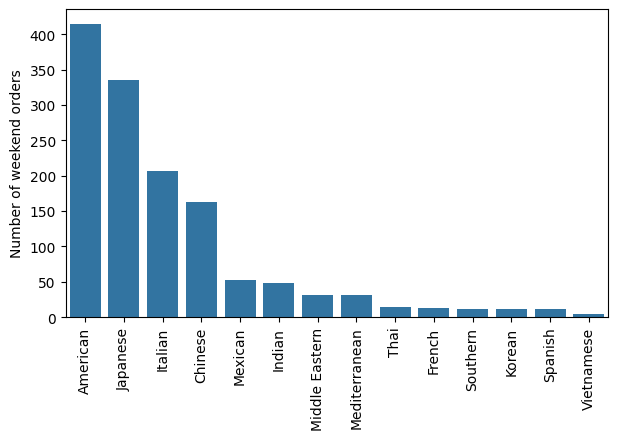

In [51]:
#plots histogram of the number of weekend orders, from highest to lowest, for each cuisine type
df_weekend= df[df['day_of_the_week']=='Weekend']
df_weekday= df[df['day_of_the_week']=='Weekday']

plt.figure(figsize=(7,4))
ax=sns.countplot(data=df_weekend, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekend orders')
plt.show()


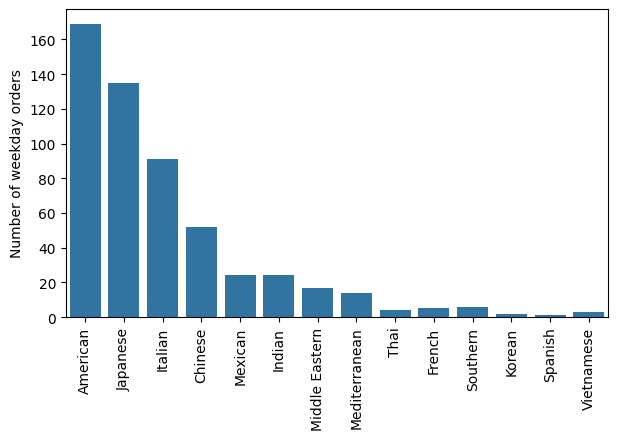

In [53]:
#plots histogram of the number of weekday orders, from highest to lowest, for each cuisine type
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df_weekday, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekday orders')
plt.show()

### **Observations**:

Weekdays: The average delivery time is approximately 28.34 minutes.

Weekends: The average delivery time is significantly shorter, around 22.47 minutes.
This is almost 6 min shorter in the weekends.


This could be because of lower trafic congestion in the weekends resulting reduced delivery time.
Also, restaurants might have more staffs during weekend so as to fullfill the higher number of orders.



### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:

This project involved an analysis of 1,898 food orders from the FoodHub app, focusing on the relationship between user feedback ratings and various other factors in the dataset.
Ratings play a crucial role in app-based restaurant recommendations, helping drive customer choices.
Additionally, other variables in this dataset offer insights into factors affecting delivery efficiency.

Key findings:


* Out of the 12 available cuisine options, American, Japanese, Italian, and Chinese are the most popular, each receiving over 200 orders.

* Increased order volumes are seen on weekends, indicating a rise in demand when customers have more free time.


* On average, delivery times are 6 minutes longer on weekdays (28 minutes) than on weekends (22 minutes).

* Feedback ratings show no significant correlation with higher order costs or longer delivery times.

* While the majority of orders are under 15 USD, approximately 29.24% of orders exceed 20 USD.

* A substantial number of orders (38.78%) are not rated, indicating low engagement in providing feedback.

* The Meatball Shop has the highest average rating (4.31) among restaurants with more than 50 ratings.
Shake Shack has the highest order volume but a slightly lower average rating (4.16).





### **Recommendations**:

*  Encourage Customer Ratings: Offer incentives, like discounts or loyalty points, to increase ratings, and separate food and delivery ratings for clearer insights.

* Optimize Weekday Delivery: Improve weekday delivery times through route optimization, better staffing, and incentives for quick deliveries.

* Enhance Customer Retention: Introduce a rewards program to boost loyalty, offering discounts or freebies for frequent customers.

* Focus on Popular Cuisines and Top-Rated Restaurants: Expand partnerships with popular cuisines and promote top-rated, high-demand restaurants to attract customers.

* Support Local and Underperforming Cuisines: Provide targeted support or promotions for less popular cuisines to stimulate interest or consider reducing their presence.

* Increase High-Value Orders: Use bundle deals and promotions for larger orders to raise average order value and boost revenue.








---